# Errors in numerical analysis - corrections

## Preamble: Notebook Shortcuts

* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* CTRL + Shift + minus: split cell

## Documentation

* matplotlib: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html
* numpy: https://numpy.org/doc/



## Exercise 1: Basic of Lagrange interpolation
We look for a polynomial function $P$ of degree $n$ which exactly matches the given points $(x_i,y_i)$. It writes $$ y_i = P(x_i), \quad \forall i\in\{0,n\}. $$

Between the points we have a polynomial function. This function is built from a linear combination of Lagrange polynomials $L_i$, which forms a basis of polynomials of degree $n$.  
The Lagrange polynomial interpolant then writes $$P_n(x) = \sum_{i=0}^n y_i L_i(x), \quad L_i(x) = \prod_{j=0, j \neq i}^{n} \frac{x-x_j}{x_i - x_j}.$$

Let us plot the Lagrange basis of our dataset

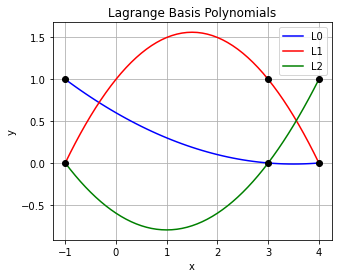

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

# data set
x = [-1, 3, 4]
y = [2, -3, 1]

#L1_coeff = [1,-1.5,.5]
#L2_coeff = [0, 2,-1]
#L3_coeff = [0,-.5,.5]

# get the polynomial function
#L1 = poly.Polynomial(L1_coeff) # L1_coeff[0] + L1_coeff[1]*X + L1_coeff[2]*X**2
#L2 = poly.Polynomial(L2_coeff)
#L3 = poly.Polynomial(L3_coeff)
L1 = lambda z : ((z-x[1])*(z-x[2])) / ((x[0]-x[1])*(x[0]-x[2]))
L2 = lambda z : ((z-x[0])*(z-x[2])) / ((x[1]-x[0])*(x[1]-x[2]))
L3 = lambda z : ((z-x[1])*(z-x[0])) / ((x[2]-x[1])*(x[2]-x[0]))

# continuous variable x_new
x_new = np.arange(x[0], x[-1]+0.1, 0.1)

fig = plt.figure(figsize = (5,4))
# plot the Lagrange basis functions
plt.plot(x_new, L1(x_new), "b", label = "L0")
plt.plot(x_new, L2(x_new), "r", label = "L1")
plt.plot(x_new, L3(x_new), "g", label = "L2")

# check the property L(x_i) = 1 if i=j, 0 if not
plt.plot(x, np.ones(len(x)), "ko", x, np.zeros(len(x)), "ko")
plt.title("Lagrange Basis Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

from scipy.interpolate import lagrange
# compute the interpolant
P = lambda z : y[0]*L1(z) + y[1]*L2(z) + y[2]*L3(z)
# compare with the scipy built-in function
f = lagrange(x,y)


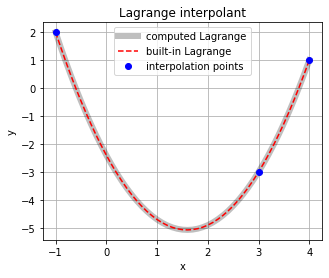

In [2]:
fig = plt.figure(figsize = (5,4))
plt.plot(x_new, P(x_new), "k-", label='computed Lagrange', linewidth=6, alpha=0.25) 
plt.plot(x_new, f(x_new), "r--", label = 'built-in Lagrange')
plt.plot(x, y, "bo", label = 'interpolation points')
plt.title("Lagrange interpolant")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise 3. Interpolating Runge function

This notebook demonstrates Lagrange interpolation of two functions: $ g(x) = \sin(5x) $ over $[0, \pi]$ and the Runge function $ f(x) = \frac{1}{1 + x^2} $ over different intervals, using equidistant and Chebyshev nodes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define functions
def g(x):
    """Function g(x) = sin(5x)."""
    return np.sin(5 * x)

def runge(x):
    """Runge function f(x) = 1 / (1 + x^2)."""
    return 1 / (1 + 25*x**2)

# Error calculation function
def absolute_error(f, interpolant, x_vals):
    """Calculate the absolute error between a function f and its interpolant over x_vals."""
    return np.abs(f(x_vals) - interpolant(x_vals))

# Interpolation with equidistant nodes
def interpolate_equidistant(f, a, b, n):
    """Interpolate function f on [a, b] using n equidistant nodes."""
    x_equidistant = np.linspace(a, b, n)
    y_equidistant = f(x_equidistant)
    interpolant = lagrange(x_equidistant, y_equidistant)
    return interpolant

# Interpolation with Chebyshev nodes
def interpolate_chebyshev(f, a, b, n):
    """Interpolate function f on [a, b] using n Chebyshev nodes."""
    # Map Chebyshev nodes from [-1, 1] to [a, b]
    x_chebyshev = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(1, n+1) - 1) / (2 * n) * np.pi)
    y_chebyshev = f(x_chebyshev)
    interpolant = lagrange(x_chebyshev, y_chebyshev)
    return interpolant

In [42]:
# Define parameters
a_g, b_g = 0, np.pi  # Interval for g(x)
a_r, b_r = -1, 1     # Interval for Runge function
x_plot_g = np.linspace(a_g, b_g, 500)  # For error plot in [0, pi]
x_plot_r = np.linspace(a_r, b_r, 500)  # For error plot in [-5, 5]

# Interpolation orders to test
n_values = np.arange(2,21)

# Store errors for comparison
errors_g_equi, errors_g_cheb = [], []
errors_r_equi_a1, errors_r_cheb_a1 = [], []
errors_r_equi_a5, errors_r_cheb_a5 = [], []

# Perform interpolation for g(x)
for n in n_values:
    # Equidistant
    interp_g_equi = interpolate_equidistant(g, a_g, b_g, n)
    error_g_equi = absolute_error(g, interp_g_equi, x_plot_g)
    errors_g_equi.append(np.max(error_g_equi))

    # Chebyshev
    interp_g_cheb = interpolate_chebyshev(g, a_g, b_g, n)
    error_g_cheb = absolute_error(g, interp_g_cheb, x_plot_g)
    errors_g_cheb.append(np.max(error_g_cheb))

# Perform interpolation for Runge function
for n in n_values:
    # Equidistant
    interp_r_equi_a1 = interpolate_equidistant(runge, a_r, b_r, n)
    error_r_equi_a1 = absolute_error(runge, interp_r_equi_a1, x_plot_r)
    errors_r_equi_a1.append(np.max(error_r_equi_a1))

    # Chebyshev
    interp_r_cheb_a1 = interpolate_chebyshev(runge, a_r, b_r, n)
    error_r_cheb_a1 = absolute_error(runge, interp_r_cheb_a1, x_plot_r)
    errors_r_cheb_a1.append(np.max(error_r_cheb_a1))


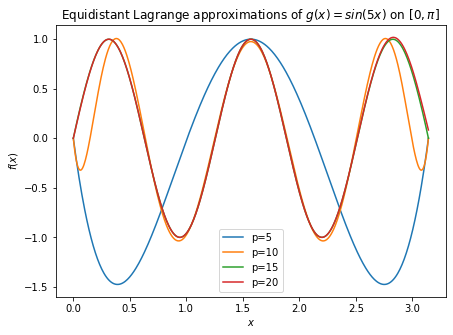

In [26]:
# Plot interpolations
plt.figure(figsize=(7,5))
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 5)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=5')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 10)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=10')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 15)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=15')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 20)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=20')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Equidistant Lagrange approximations of $g(x) = sin(5x)$ on $[0, \pi]$");

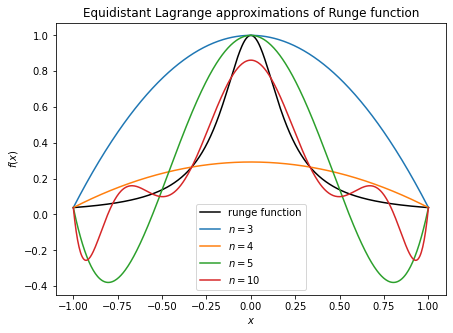

In [44]:
# Plot interpolations
plt.figure(figsize=(7,5))
plt.plot(x_plot_r,runge(x_plot_r),'k',label='runge function')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 3)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=3$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 4)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=4$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 5)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=5$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 10)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=10$')
#interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 15)
#plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='p=15')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Equidistant Lagrange approximations of Runge function");

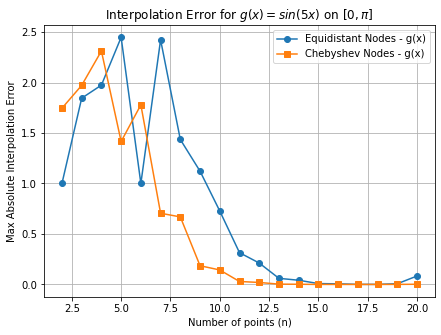

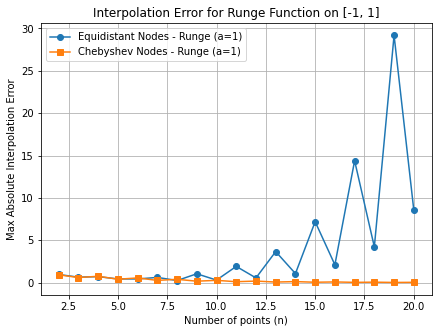

In [43]:
# Plot errors for g(x)
plt.figure(figsize=(7,5))
plt.plot(n_values, errors_g_equi, 'o-', label="Equidistant Nodes - g(x)")
plt.plot(n_values, errors_g_cheb, 's-', label="Chebyshev Nodes - g(x)")
plt.xlabel("Number of points (n)")
plt.ylabel("Max Absolute Interpolation Error")
plt.title("Interpolation Error for $g(x) = sin(5x)$ on $[0, \pi]$")
plt.legend()
plt.grid()
plt.show()

# Plot errors for Runge function with a=1
plt.figure(figsize=(7,5))
plt.plot(n_values, errors_r_equi_a1, 'o-', label="Equidistant Nodes - Runge (a=1)")
plt.plot(n_values, errors_r_cheb_a1, 's-', label="Chebyshev Nodes - Runge (a=1)")
plt.xlabel("Number of points (n)")
plt.ylabel("Max Absolute Interpolation Error")
plt.title("Interpolation Error for Runge Function on [-1, 1]")
plt.legend()
plt.grid()
plt.show()

## Exercise 3. Linear piecewise interpolation
Implement a piecewise interpolation for the set of points ${x_0, x_1, x_2} = {0, 1, 2}$ and data ${y_0, y_1, y_2} = {1, 3, 2}$. 
Generalize your code for an interval $I = [a, b]$ made of $(n + 1)$ sub-intervals, using a random set of data 
"numpy.random.rand(N points)".

In [60]:
N = 6
xmin, xmax = 0., 1.5
xi = np.linspace(xmin, xmax, N)
yi = np.random.rand(N)
print("x data:", xi, "\n")
print("y data:", yi, "\n")

x data: [0.  0.3 0.6 0.9 1.2 1.5] 

y data: [0.75350699 0.47913415 0.80619689 0.50607591 0.35735344 0.83568265] 



In [61]:
def cubic_spline(x, y):
    """
    Interpolate using natural cubic splines.
    
    Generates a strictly diagonal dominant matrix then solves the linear system for the cubic splines coefficients.
    
    Returns coefficients:
    b, coefficient of x of degree 1
    c, coefficient of x of degree 2
    d, coefficient of x of degree 3
    """ 
    x = np.array(x)
    y = np.array(y)
    ### check if sorted
    if np.any(np.diff(x) < 0):
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]

    size = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    
    ### Get matrix A
    A = np.zeros(shape = (size,size))
    b = np.zeros(shape=(size,1))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,size-1):
        A[i, i-1] = delta_x[i-1]
        A[i, i+1] = delta_x[i]
        A[i,i] = 2*(delta_x[i-1]+delta_x[i])
    ### Get matrix b
        b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])
        
    ### Solves for c in Ac = b
    print('Solving linear system:')
    c = np.linalg.solve(A, b)
    
    ### Solves for d and b
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b.squeeze(), c.squeeze(), d.squeeze()

Solving linear system:


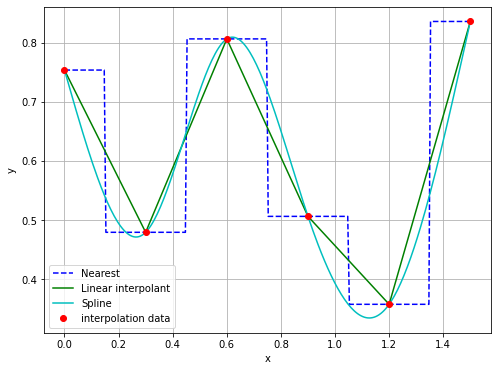

In [62]:
def interpolate(xi, yi, kind, N):
	y = np.zeros(N*(len(xi)-1))
	x = np.zeros(N*(len(xi)-1))

	def local_interp(x0, x1, y0, y1, kind, b, c, d):
		x_pw = np.linspace(x0, x1, N)
		f_interp = np.zeros(len(x_pw))
		
		if (kind == "nearest"):
			for j in range(len(x_pw)):
				if abs(x_pw[j] - x0) < abs(x_pw[j] - x1):
					f_interp[j] = y0
				else:
					f_interp[j] = y1

		elif (kind == "linear"):
			a = (y1-y0)/(x1-x0)
			f_interp = y0 + a*(x_pw-x0)

		elif (kind == "spline"):
			f_interp = y0 + b*(x_pw-x0) + c*(x_pw-x0)**2 + d*(x_pw-x0)**3

		else:
			raise Exception("method not known !")

		return x_pw, f_interp

	if (kind == "spline"):
		b, c, d = cubic_spline(xi, yi)
	else:
		b = np.zeros(len(xi)-1)
		c = np.zeros(len(xi)-1)
		d = np.zeros(len(xi)-1)

	for i in range(len(xi)-1):
		x_pw, f_interp = local_interp(xi[i], xi[i+1], yi[i], yi[i+1], kind, b[i], c[i], d[i])
		x[i*N:(i+1)*N] = x_pw
		y[i*N:(i+1)*N] = f_interp
	
	return x, y

N_plot = 50
x, y_near = interpolate(xi, yi, "nearest", N_plot)
x, y_lin = interpolate(xi, yi, "linear", N_plot)
x, y_spline = interpolate(xi, yi, "spline", N_plot)
plt.figure(figsize = (8,6))
plt.plot(x, y_near, "b--", label = "Nearest")
plt.plot(x, y_lin, "g-", label = "Linear interpolant")
plt.plot(x, y_spline, "c-", label = "Spline")
plt.plot(xi,yi, 'ro', label="interpolation data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()